## initial

In [1]:
%cd C:\Users\itaye\Desktop\pdexplain\pd-explain\src

C:\Users\itaye\Desktop\pdexplain\pd-explain\src


C:\Users\itaye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import pandas as pd
import pd_explain
import warnings
import numpy as np
warnings.filterwarnings("ignore")

C:\Users\itaye\AppData\Local\Temp\ipykernel_26512\488636937.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


usetex-False


In [3]:
spotify_all = (pd.read_csv(r"C:\Users\itaye\Desktop\pdexplain\pd-explain\Examples\Datasets\spotify_all.csv"))
# spotify_all = (pd.read_csv(r"C:\Users\User\Desktop\pd_explain_test\pd-explain\Examples\Datasets\spotify_all.csv"))

In [16]:
acousticness_cats = [0, 0.2, 0.4, 0.6, 0.8, 1]
spotify_all['acousticness'] = pd.cut(spotify_all['acousticness'], bins=acousticness_cats)

In [5]:
spotify_all['acousticness'] = spotify_all['acousticness'].apply(lambda x: str(x))

In [6]:
spotify_all['acousticness'][0]

'(0.8, 1.0]'

In [7]:
popular = spotify_all[spotify_all.popularity > 65]

In [8]:
mean_popularity_by_acousticness = spotify_all.groupby(['acousticness']).popularity.mean()

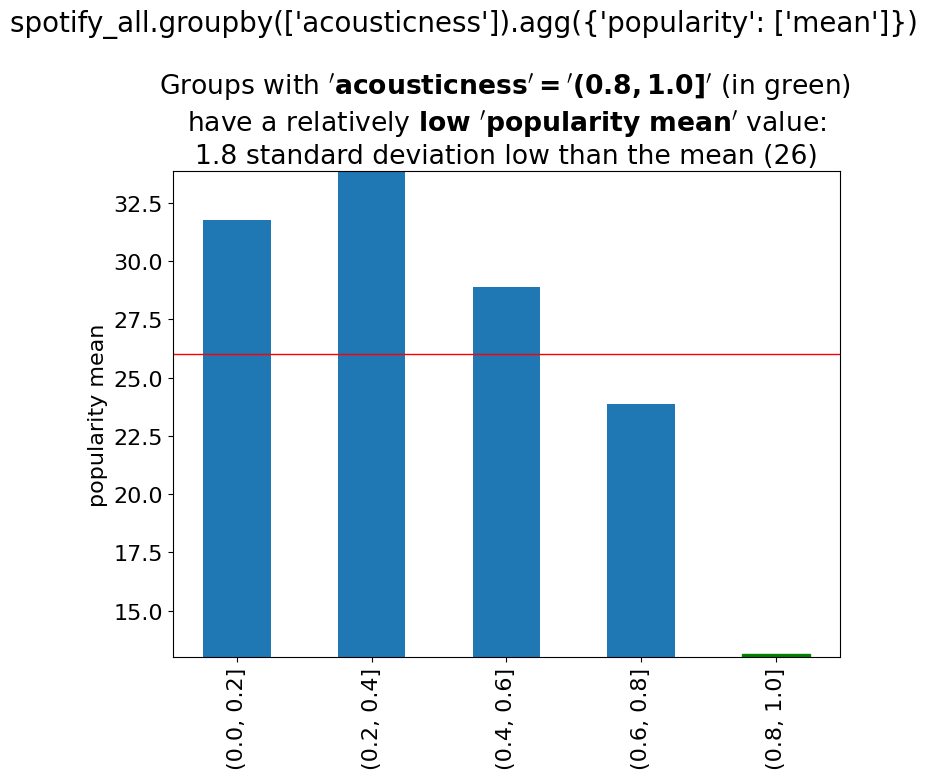

In [9]:
mean_popularity_by_acousticness.explain()

## example 0

In [5]:
mean_popularity_by_acousticness.explain(explainer='outlier', target='(0.8, 1.0]', dir=-1)

NameError: name 'mean_popularity_by_acousticness' is not defined

## example 1

In [17]:
old = spotify_all[spotify_all.decade <= 1960 ]
# spotify_filtered = spotify_all[(spotify_all.loudness <= -28) & (spotify_all['decade'] <= 2000)]

The highlighted outlier might have been
caused by rows that follow this predicate:

$\bf{explicit=1}$, 
$\bf{-8.92 < loudness < -5.72}$, 
$\bf{mode=0}$, 
$\bf{key=4}$, 
$\bf{60.88 < tempo < 73.05}$, 
$\bf{0.4 < danceability < 0.45}$, 
$\bf{0.85 < instrumentalness < 0.9}$, 



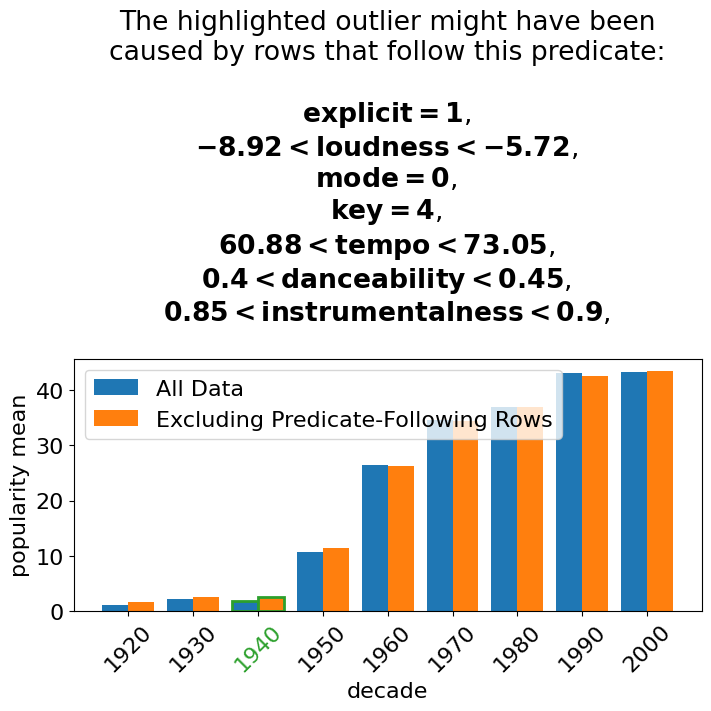

In [18]:
spotify_filtered = spotify_all[(spotify_all['decade'] <= 2000)]
spotify_filtered_grouped = spotify_filtered.groupby(['decade']).popularity.mean()
# spotify_filtered_grouped.explain()
print(spotify_filtered_grouped.explain(explainer='outlier',target=1940 , dir=-1, control=[1950]))


In [11]:
print(spotify_all['decade'].corr(spotify_all['year']))

0.9940166448140191


## example 2

<Axes: xlabel='decade'>

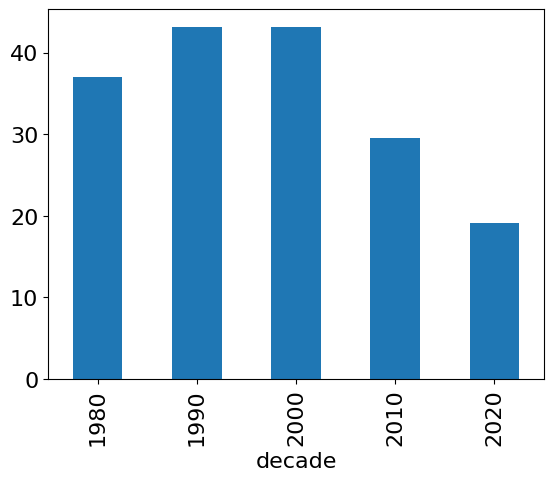

In [101]:
new_songs = spotify_all[spotify_all['decade']>1970]
grouped3 = new_songs.groupby(['decade'])
grouped3_mean_by_popularity = grouped3['popularity'].agg('mean')
grouped3_mean_by_popularity.plot(kind='bar')

In [102]:
print(grouped3_mean_by_popularity.explain(explainer='outlier', target=2020, dir=-1, control=[1980]))

KeyboardInterrupt: 

In [12]:
explicit = spotify_all[(spotify_all['explicit'] == 0) & (spotify_all['decade'] >= 1950) & (spotify_all['decade'] <= 2010)]

In [13]:
explicit_by_decade = explicit.groupby(['decade']).id.count()

In [14]:
explicit_by_decade

decade
1950    19845
1960    19598
1970    20050
1980    19612
1990    18037
2000    12032
2010    18645
Name: id_count, dtype: int64

In [15]:
explicit_by_decade.explain(explainer='outlier', target=2000, dir=-1)

ZeroDivisionError: division by zero